# TD 4

[Use PyTorch for all questions]

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import time

## Width vs Depth

Our goal here is to compare the performances of basic networks.
We will create both very wide and very deep networks, and see which ones are better.

We will try to fit a sequence of functions with increasing complexity, both with a wide and with a deep network.
The first part concentrates on the minimal amount of neurons needed to fit the function with an optimal network (setting the weights and biases manually).
Then, the second part studies the training of the same networks, to fit the same functions. 

### Theory

Taking the function of interest: $f: \mathbb{R} \to \mathbb{R}$ to be linear by segment, with 4 segments:
- $f(x) = 0$ on $\left] -\infty, 0 \right]$
- $f(x) = 2x$ on $\left] 0, \frac{1}{2} \right]$
- $f(x) = 2-2x$ on $\left] \frac{1}{2}, 1 \right]$
- $f(x) = 0$ on $\left] 1, \infty \right]$

Define $f : x\: \rightarrow f(x)$ as a python function, using numpy.

Let also:
- $g(x, 2) = f \circ f(x)$
- $g(x, 3) = f \circ f \circ f(x)$
- $g(x, 4) = f \circ f \circ f \circ f(x)$
- etc...

Define $g : x\: \rightarrow g(x, l)$ as a python function for all $l \in \mathbb{N}^*$.

Plot $f$ and $g$ on $\left] -0.2, 1.2 \right]$

Define a basic "rectange" network class (width is the same in all hidden layers);
leave the number of layers and number of neurons per layer as parameters, and use ReLU activation function.
The input and output are 1D, since we fit functions $\mathbb{R} \to \mathbb{R}$.

With 4 hidden layers and 5 neurons per layer, your network class should create a network as follows:

<svg
   width="35em"
   height="25em"
   viewBox="0 0 297 210"
   version="1.1"
   id="svg5"
   xml:space="preserve"
   inkscape:version="1.2.1 (9c6d41e410, 2022-07-14)"
   sodipodi:docname="rectangle.svg"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg"><sodipodi:namedview
     id="namedview7"
     pagecolor="#ffffff"
     bordercolor="#000000"
     borderopacity="0.25"
     inkscape:showpageshadow="2"
     inkscape:pageopacity="0.0"
     inkscape:pagecheckerboard="0"
     inkscape:deskcolor="#d1d1d1"
     inkscape:document-units="mm"
     showgrid="false"
     inkscape:zoom="0.74208052"
     inkscape:cx="582.14707"
     inkscape:cy="386.0767"
     inkscape:window-width="1920"
     inkscape:window-height="991"
     inkscape:window-x="4791"
     inkscape:window-y="-9"
     inkscape:window-maximized="1"
     inkscape:current-layer="g192" /><defs
     id="defs2" /><g
     inkscape:label="Layer 1"
     inkscape:groupmode="layer"
     id="layer1" /><g
     id="g192"
     transform="matrix(-0.29345204,0,0,-0.29345206,278.04853,311.27133)"><path
       d="m 745.6513,951.91321 v -498 H 142.46805 v 498 z"
       style="fill:none;stroke:#808080;stroke-width:3.40771175;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path208"
       sodipodi:nodetypes="ccccc" /><path
       d="m 897.45605,684.91321 c -9.941,0 -18,8.059 -18,18 0,9.941 8.059,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#2ecc71;fill-opacity:1;fill-rule:nonzero;stroke:#2ecc71;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path216"
       sodipodi:nodetypes="csssc" /><path
       d="m 717.45605,900.91321 c -9.941,0 -18,8.059 -18,18 0,9.941 8.059,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path222"
       sodipodi:nodetypes="csssc" /><path
       d="m 885.32305,716.42521 c -31.969,38.789 -123.777,150.199 -155.738,188.98"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path228"
       sodipodi:nodetypes="cc" /><path
       d="m 717.45605,468.91321 c -9.941,0 -18,8.059 -18,18 0,9.941 8.059,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path230"
       sodipodi:nodetypes="csssc" /><path
       d="m 885.32305,689.40121 c -31.969,-38.789 -123.777,-150.199 -155.738,-188.98"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path236"
       sodipodi:nodetypes="cc" /><path
       d="m 717.45605,576.91321 c -9.941,0 -18,8.059 -18,18 0,9.941 8.059,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path238"
       sodipodi:nodetypes="csssc" /><path
       d="m 881.58505,693.89021 c -33.59,-20.379 -114.996,-69.774 -148.426,-90.055"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path244"
       sodipodi:nodetypes="cc" /><path
       d="m 717.45605,684.91321 c -9.941,0 -18,8.059 -18,18 0,9.941 8.059,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path246"
       sodipodi:nodetypes="csssc" /><path
       d="m 879.06505,702.91321 h -143.148"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path252"
       sodipodi:nodetypes="cc" /><path
       d="m 717.45605,792.91321 c -9.941,0 -18,8.059 -18,18 0,9.941 8.059,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path254"
       sodipodi:nodetypes="csssc" /><path
       d="m 881.58505,711.93621 c -33.59,20.379 -114.996,69.774 -148.426,90.055"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path260"
       sodipodi:nodetypes="cc" /><path
       d="m 535.95605,904.91321 c -9.937,0 -18,8.059 -18,18 0,9.941 8.063,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path262"
       sodipodi:nodetypes="csssc" /><path
       d="m 699.24505,919.29621 c -34.223,0.762 -110.469,2.461 -144.863,3.23"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path268"
       sodipodi:nodetypes="cc" /><path
       d="m 535.95605,467.91321 c -9.937,0 -18,8.059 -18,18 0,9.941 8.063,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path270"
       sodipodi:nodetypes="csssc" /><path
       d="m 709.53005,902.20621 c -28.605,-69.008 -137.375,-331.387 -165.761,-399.867"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path276"
       sodipodi:nodetypes="cc" /><path
       d="m 535.95605,575.91321 c -9.937,0 -18,8.059 -18,18 0,9.941 8.063,18 18,18 9.941,0 18,-8.059 18,-18 0,-9.941 -8.059,-18 -18,-18"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path278"
       sodipodi:nodetypes="csssc" /><path
       d="m 707.80005,903.23721 c -30.395,-55.031 -132.016,-239.023 -162.27,-293.804"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path284"
       sodipodi:nodetypes="cc" /><path
       d="m 535.95605,683.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.77,0 19.5,-8.726 19.5,-19.496 0,-10.77 -8.73,-19.496 -19.5,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path286"
       sodipodi:nodetypes="csssc" /><path
       d="m 705.22905,905.40121 c -31.929,-38.422 -123.058,-148.082 -156.109,-187.855"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path292"
       sodipodi:nodetypes="cc" /><path
       d="m 535.95605,794.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.77,0 19.5,-8.726 19.5,-19.496 0,-10.77 -8.73,-19.496 -19.5,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path294"
       sodipodi:nodetypes="csssc" /><path
       d="m 701.46005,910.14021 c -33.367,-19.516 -113.524,-66.407 -148.133,-86.653"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path300"
       sodipodi:nodetypes="cc" /><path
       d="m 709.64005,503.47221 c -28.434,69.062 -137.411,333.769 -165.86,402.867"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path302"
       sodipodi:nodetypes="cc" /><path
       d="m 699.24505,486.81521 c -34.223,-0.187 -110.469,-0.613 -144.863,-0.804"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path304"
       sodipodi:nodetypes="cc" /><path
       d="m 701.46005,495.85021 c -33.871,20.192 -115.965,69.129 -149.676,89.223"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path306"
       sodipodi:nodetypes="cc" /><path
       d="m 705.22905,500.42521 c -31.929,38.422 -123.058,148.082 -156.109,187.855"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path308"
       sodipodi:nodetypes="cc" /><path
       d="m 707.80005,502.68621 c -30.184,54.985 -130.614,237.938 -161.633,294.454"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path310"
       sodipodi:nodetypes="cc" /><path
       d="m 708.03805,610.29221 c -30.078,54.969 -132.09,241.375 -162.473,296.891"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path312"
       sodipodi:nodetypes="cc" /><path
       d="m 701.46005,585.80821 c -33.871,-20.571 -115.965,-70.422 -149.676,-90.891"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path314"
       sodipodi:nodetypes="cc" /><path
       d="m 699.24505,594.81521 c -34.223,-0.187 -110.469,-0.613 -144.863,-0.804"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path316"
       sodipodi:nodetypes="cc" /><path
       d="m 701.46005,603.93621 c -33.367,20.075 -113.524,68.305 -148.133,89.129"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path318"
       sodipodi:nodetypes="cc" /><path
       d="m 705.22905,608.61221 c -31.929,38.953 -123.058,150.141 -156.109,190.465"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path320"
       sodipodi:nodetypes="cc" /><path
       d="m 705.22905,716.67521 c -32.238,39.508 -124.816,152.98 -157.046,192.48"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path322"
       sodipodi:nodetypes="cc" /><path
       d="m 705.22905,689.33921 c -32.238,-38.969 -124.816,-150.895 -157.046,-189.856"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path324"
       sodipodi:nodetypes="cc" /><path
       d="m 701.46005,693.80821 c -33.871,-20.571 -115.965,-70.422 -149.676,-90.891"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path326"
       sodipodi:nodetypes="cc" /><path
       d="m 699.24505,702.91321 h -143.519"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path328"
       sodipodi:nodetypes="cc" /><path
       d="m 701.46005,712.18621 c -33.449,20.684 -113.93,70.454 -148.395,91.766"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path330"
       sodipodi:nodetypes="cc" /><path
       d="m 701.76905,820.07721 c -33.661,21.004 -116.067,72.422 -149.918,93.543"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path332"
       sodipodi:nodetypes="cc" /><path
       d="m 707.80005,795.23721 c -30.395,-55.031 -132.016,-239.023 -162.27,-293.804"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path334"
       sodipodi:nodetypes="cc" /><path
       d="m 705.22905,797.33921 c -32.238,-38.969 -124.816,-150.895 -157.046,-189.856"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path336"
       sodipodi:nodetypes="cc" /><path
       d="m 701.46005,801.89021 c -33.367,-20.075 -113.524,-68.305 -148.133,-89.129"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path338"
       sodipodi:nodetypes="cc" /><path
       d="m 699.24505,811.20221 c -33.781,0.563 -108.523,1.813 -143.519,2.398"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path340"
       sodipodi:nodetypes="cc" /><path
       d="m 352.96005,794.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path342"
       sodipodi:nodetypes="csssc" /><path
       d="m 520.14705,913.99121 c -33.519,-20.183 -114.972,-69.238 -149.875,-90.254"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path348"
       sodipodi:nodetypes="cc" /><path
       d="m 352.96005,905.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path350"
       sodipodi:nodetypes="csssc" /><path
       d="m 517.60405,923.10421 c -34.066,0.375 -109.429,1.211 -144.718,1.598"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path356"
       sodipodi:nodetypes="cc" /><path
       d="m 352.96005,461.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path358"
       sodipodi:nodetypes="csssc" /><path
       d="m 528.19405,906.39321 c -28.367,-69.269 -137.605,-336.031 -166.945,-407.679"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path364"
       sodipodi:nodetypes="cc" /><path
       d="m 352.96005,572.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path366"
       sodipodi:nodetypes="csssc" /><path
       d="m 526.47205,907.39321 c -30.125,-55.089 -131.778,-240.988 -163.184,-298.425"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path372"
       sodipodi:nodetypes="cc" /><path
       d="m 352.96005,683.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path374"
       sodipodi:nodetypes="csssc" /><path
       d="m 523.63605,909.15121 c -32.196,-39.133 -124.086,-150.824 -157.41,-191.332"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path380"
       sodipodi:nodetypes="cc" /><path
       d="m 526.47205,501.29221 c -30.125,54.59 -131.778,238.801 -163.184,295.723"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path382"
       sodipodi:nodetypes="cc" /><path
       d="m 528.08505,502.58521 c -28.543,69.226 -137.57,333.672 -166.852,404.687"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path384"
       sodipodi:nodetypes="cc" /><path
       d="m 517.60405,485.43321 c -34.066,-0.942 -109.429,-3.024 -144.718,-3.997"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path386"
       sodipodi:nodetypes="cc" /><path
       d="m 519.83905,494.76821 c -33.645,19.704 -114.477,67.04 -149.375,87.481"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path388"
       sodipodi:nodetypes="cc" /><path
       d="m 523.63605,499.48721 c -32.196,38.598 -124.086,148.766 -157.41,188.723"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path390"
       sodipodi:nodetypes="cc" /><path
       d="m 523.63605,607.67521 c -32.196,39.133 -124.086,150.824 -157.41,191.332"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path392"
       sodipodi:nodetypes="cc" /><path
       d="m 526.47205,609.43321 c -30.125,55.089 -131.778,240.988 -163.184,298.425"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path394"
       sodipodi:nodetypes="cc" /><path
       d="m 520.14705,584.66721 c -33.605,-20.981 -115.382,-72.039 -150.136,-93.734"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path396"
       sodipodi:nodetypes="cc" /><path
       d="m 517.60405,593.72221 c -34.066,-0.375 -109.429,-1.211 -144.718,-1.598"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path398"
       sodipodi:nodetypes="cc" /><path
       d="m 520.14705,602.83521 c -33.519,20.183 -114.972,69.238 -149.875,90.254"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path400"
       sodipodi:nodetypes="cc" /><path
       d="m 518.89705,712.76521 c -34.261,21.011 -114.191,70.027 -148.648,91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path402"
       sodipodi:nodetypes="cc" /><path
       d="m 522.80005,717.82321 c -32.973,40.442 -123.824,151.879 -156.735,192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path404"
       sodipodi:nodetypes="cc" /><path
       d="m 522.80005,688.00321 c -32.973,-40.442 -123.824,-151.879 -156.735,-192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path406"
       sodipodi:nodetypes="cc" /><path
       d="m 518.89705,693.06121 c -34.261,-21.011 -114.191,-70.027 -148.648,-91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path408"
       sodipodi:nodetypes="cc" /><path
       d="m 516.26905,702.91321 h -143.45"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path410"
       sodipodi:nodetypes="cc" /><path
       d="m 516.26905,813.91321 h -143.45"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path412"
       sodipodi:nodetypes="cc" /><path
       d="m 518.89705,823.76521 c -34.261,21.011 -114.191,70.027 -148.648,91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path414"
       sodipodi:nodetypes="cc" /><path
       d="m 525.73305,796.94021 c -31.047,-57.121 -131.547,-242.019 -162.566,-299.09"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path416"
       sodipodi:nodetypes="cc" /><path
       d="m 522.80005,799.00321 c -32.973,-40.442 -123.824,-151.879 -156.735,-192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path418"
       sodipodi:nodetypes="cc" /><path
       d="m 518.89705,804.06121 c -34.261,-21.011 -114.191,-70.027 -148.648,-91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path420"
       sodipodi:nodetypes="cc" /><path
       d="m 169.96405,794.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path422"
       sodipodi:nodetypes="csssc" /><path
       d="m 333.27205,813.91321 h -143.449"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path428"
       sodipodi:nodetypes="cc" /><path
       d="m 169.96405,905.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path430"
       sodipodi:nodetypes="csssc" /><path
       d="m 335.89705,823.76521 c -34.257,21.011 -114.187,70.027 -148.644,91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path436"
       sodipodi:nodetypes="cc" /><path
       d="m 169.96405,461.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path438"
       sodipodi:nodetypes="csssc" /><path
       d="m 342.73705,796.94021 c -31.051,-57.121 -131.547,-242.019 -162.566,-299.09"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path444"
       sodipodi:nodetypes="cc" /><path
       d="m 169.96405,572.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path446"
       sodipodi:nodetypes="csssc" /><path
       d="m 339.80405,799.00321 c -32.973,-40.442 -123.825,-151.879 -156.735,-192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path452"
       sodipodi:nodetypes="cc" /><path
       d="m 169.96405,683.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#3498db;fill-opacity:1;fill-rule:nonzero;stroke:#3498db;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path454"
       sodipodi:nodetypes="csssc" /><path
       d="m 335.89705,804.06121 c -34.257,-21.011 -114.187,-70.027 -148.644,-91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path460"
       sodipodi:nodetypes="cc" /><path
       d="m 335.89705,915.06121 c -34.257,-21.011 -114.187,-70.027 -148.644,-91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path462"
       sodipodi:nodetypes="cc" /><path
       d="m 333.27205,924.91321 h -143.449"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path464"
       sodipodi:nodetypes="cc" /><path
       d="m 344.64405,906.95621 c -29.235,-71.707 -137.43,-337.117 -166.465,-408.352"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path466"
       sodipodi:nodetypes="cc" /><path
       d="m 342.73705,907.94021 c -31.051,-57.121 -131.547,-242.019 -162.566,-299.09"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path468"
       sodipodi:nodetypes="cc" /><path
       d="m 339.80405,910.00321 c -32.973,-40.442 -123.825,-151.879 -156.735,-192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path470"
       sodipodi:nodetypes="cc" /><path
       d="m 342.73705,497.88621 c -31.051,57.121 -131.547,242.019 -162.566,299.089"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path472"
       sodipodi:nodetypes="cc" /><path
       d="m 344.64405,498.87021 c -29.235,71.707 -137.43,337.117 -166.465,408.352"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path474"
       sodipodi:nodetypes="cc" /><path
       d="m 333.27205,480.91321 h -143.449"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path476"
       sodipodi:nodetypes="cc" /><path
       d="m 335.89705,490.76521 c -34.257,21.011 -114.187,70.027 -148.644,91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path478"
       sodipodi:nodetypes="cc" /><path
       d="m 339.80405,495.82321 c -32.973,40.442 -123.825,151.879 -156.735,192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path480"
       sodipodi:nodetypes="cc" /><path
       d="m 339.80405,606.82321 c -32.973,40.442 -123.825,151.879 -156.735,192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path482"
       sodipodi:nodetypes="cc" /><path
       d="m 342.73705,608.88621 c -31.051,57.121 -131.547,242.019 -162.566,299.089"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path484"
       sodipodi:nodetypes="cc" /><path
       d="m 335.89705,582.06121 c -34.257,-21.011 -114.187,-70.027 -148.644,-91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path486"
       sodipodi:nodetypes="cc" /><path
       d="m 333.27205,591.91321 h -143.449"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path488"
       sodipodi:nodetypes="cc" /><path
       d="m 335.89705,601.76521 c -34.257,21.011 -114.187,70.027 -148.644,91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path490"
       sodipodi:nodetypes="cc" /><path
       d="m 335.89705,712.76521 c -34.257,21.011 -114.187,70.027 -148.644,91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path492"
       sodipodi:nodetypes="cc" /><path
       d="m 339.80405,717.82321 c -32.973,40.442 -123.825,151.879 -156.735,192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path494"
       sodipodi:nodetypes="cc" /><path
       d="m 339.80405,688.00321 c -32.973,-40.442 -123.825,-151.879 -156.735,-192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path496"
       sodipodi:nodetypes="cc" /><path
       d="m 335.89705,693.06121 c -34.257,-21.011 -114.187,-70.027 -148.644,-91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path498"
       sodipodi:nodetypes="cc" /><path
       d="m 333.27205,702.91321 h -143.449"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path500"
       sodipodi:nodetypes="cc" /><path
       d="m -13.03195,683.41721 c -10.766,0 -19.496,8.726 -19.496,19.496 0,10.77 8.73,19.496 19.496,19.496 10.769,0 19.496,-8.726 19.496,-19.496 0,-10.77 -8.727,-19.496 -19.496,-19.496"
       style="fill:#e74c3c;fill-opacity:1;fill-rule:nonzero;stroke:#e74c3c;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path502"
       sodipodi:nodetypes="csssc" /><path
       d="m 152.90105,804.06121 c -34.257,-21.011 -114.187,-70.027 -148.648,-91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path508"
       sodipodi:nodetypes="cc" /><path
       d="m 156.80805,910.00321 c -32.973,-40.442 -123.825,-151.879 -156.735,-192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path510"
       sodipodi:nodetypes="cc" /><path
       d="m 156.80805,495.82321 c -32.973,40.442 -123.825,151.879 -156.735,192.242"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path512"
       sodipodi:nodetypes="cc" /><path
       d="m 152.90105,601.76521 c -34.257,21.011 -114.187,70.027 -148.648,91.16"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path514"
       sodipodi:nodetypes="cc" /><path
       d="M 150.27605,702.91321 H 6.82705"
       style="fill:none;stroke:#707070;stroke-width:1;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10;stroke-dasharray:none;stroke-opacity:1"
       id="path516"
       sodipodi:nodetypes="cc" /></g></svg>

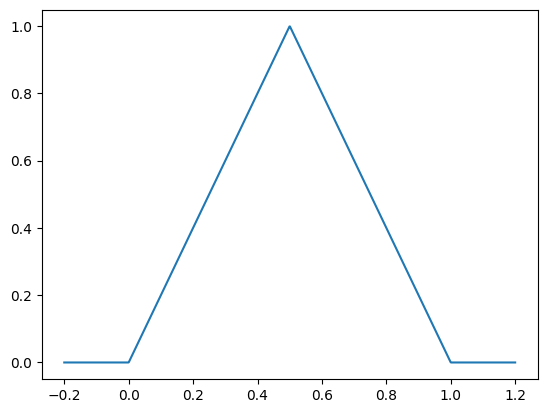

In [3]:
x = np.linspace(-0.2, 1.2, 1000)

def f(x):
    if x <= 0:
        return 0
    elif x <= 0.5:
        return 2*x
    elif x <= 1:
        return (2 - 2*x)
    else :
        return 0

y = [f(a) for a in x]

plt.plot(x, y)
plt.show()




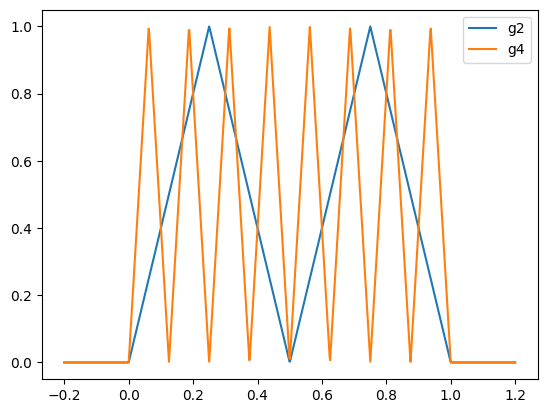

In [7]:
def g(x,l):
    a = x
    for i in range(l):
        a = f(a)
    return a

y2 = [g(a, 2) for a in x]
y4 = [g(a, 4) for a in x]
plt.plot(x, y2, label="g2")
plt.plot(x, y4, label="g4")
plt.legend()
plt.show()

Implement $f$ with a (basic) rectangle network with 1 hidden layer of 3 neurons.
Set the weights youself to fit exactly the function.

*Hint:*
$f(x) = 2x_+ -4(x-\frac{1}{2})_+ +2(x-1)_+$
$\qquad \qquad$ (where $\alpha_+$ is $ReLU(\alpha)$)

In [35]:
class rectangleNN(nn.Module):
    def __init__(self):
        super(rectangleNN,self).__init__()
        self.fc1 = nn.Linear(1,3)
        self.fc2 = nn.Linear(3,1)
    def forward(self,x):
        l1 = nn.ReLU()(self.fc1(x))
        y=self.fc2(l1)
        return y 


my_model = rectangleNN()
my_model.fc1.weight = torch.nn.Parameter(torch.tensor([[1.0],[1.0],[1.0]], dtype=torch.float32, requires_grad=True))
my_model.fc1.bias = torch.nn.Parameter(torch.tensor([0.0,-0.5,-1.0], dtype=torch.float32, requires_grad=True))
my_model.fc2.weight = torch.nn.Parameter(torch.tensor([[2.0,-4.0,2.0]], dtype=torch.float32, requires_grad=True))
my_model.fc2.bias = torch.nn.Parameter(torch.tensor([0.0], dtype=torch.float32, requires_grad=True))



my_model.fc1.weight = torch.nn.Parameter(torch.tensor([[2.0],[4.0],[2.0]], dtype=torch.float32, requires_grad=True))
my_model.fc1.bias = torch.nn.Parameter(torch.tensor([0.0,-2.0,-2.0], dtype=torch.float32, requires_grad=True))
my_model.fc2.weight = torch.nn.Parameter(torch.tensor([[1.0,-1.0,1.0]], dtype=torch.float32, requires_grad=True))
my_model.fc2.bias = torch.nn.Parameter(torch.tensor([0.0], dtype=torch.float32, requires_grad=True))
x = np.linspace(-0.2, 1.2, 100)

y = my_model.forward(torch.tensor(x, dtype=torch.float32)[:, None])



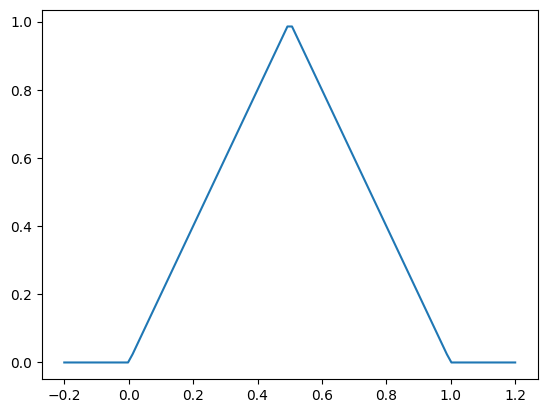

In [36]:
plt.figure()
plt.plot(x, y.detach().numpy())
plt.show()

In [68]:
class rectangleNN(nn.Module):
    def __init__(self, n,l):
        super(rectangleNN,self).__init__()
        self.fc1 = nn.Linear(1,n)
        self.intermediate = []
        for i in range(l):
            self.intermediate.append(nn.Linear(n,n))
        self.intermediate = nn.ModuleList(self.intermediate)
        self.fc2 = nn.Linear(n,1)

    def forward(self,x):
        l1 = nn.ReLU()(self.fc1(x))
        for fc in self.intermediate:
            l1 = nn.ReLU()(fc(l1))
        y=self.fc2(l1)
        return y 

Now, implement $g$ for `level = 4`, by increasing the width (and keeping a single hidden layer).
Use again a rectangle network and set the weights youself.

*Hint: try to find the weight for `level = 2`, then `level = 3`, and deduce the pattern.*

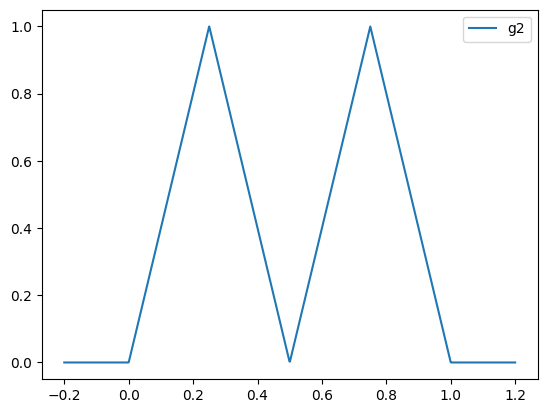

In [41]:
x = np.linspace(-0.2, 1.2, 1000)
plt.plot(x, y2, label="g2")
plt.legend()
plt.show()

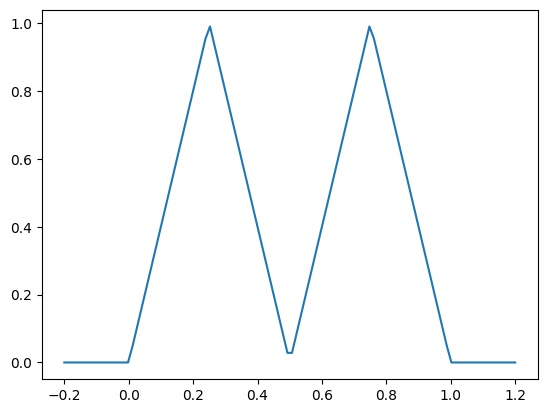

In [69]:
my_model = rectangleNN(n=5, l=0)
my_model.fc1.weight = torch.nn.Parameter(torch.tensor([[1.0],[1.0],[1.0],[1.0],[1.0]], dtype=torch.float32, requires_grad=True))
my_model.fc1.bias = torch.nn.Parameter(torch.tensor([0.0,-0.25,-0.5,-0.75,-1.0], dtype=torch.float32, requires_grad=True))
my_model.fc2.weight = torch.nn.Parameter(torch.tensor([[4.0,-8.0,8.0,-8.0,4.0]], dtype=torch.float32, requires_grad=True))
my_model.fc2.bias = torch.nn.Parameter(torch.tensor([0.0], dtype=torch.float32, requires_grad=True))
x = np.linspace(-0.2, 1.2, 100)

y = my_model.forward(torch.tensor(x, dtype=torch.float32)[:, None])

plt.figure()
plt.plot(x, y.detach().numpy())
plt.show()


In [70]:
def weight(N):
    k = 2**N
    inf = 2**N
    res = [inf]
    sign = -1
    for i in range(1,k):
        res.append(sign*2*k)
        sign = -sign
    res.append(inf)
    return res

print(weight(2))

[4, -8, 8, -8, 4]


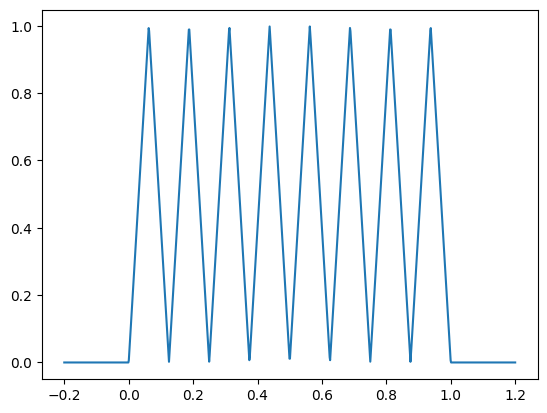

In [71]:
N=4
my_model = rectangleNN(n=2**N+1, l=0)
my_model.fc1.weight = torch.nn.Parameter(torch.tensor([[1.0]*(2**N+1)], dtype=torch.float32, requires_grad=True).T)
my_model.fc1.bias = torch.nn.Parameter(torch.tensor(np.linspace(0,-1,2**N+1), dtype=torch.float32, requires_grad=True))
my_model.fc2.weight = torch.nn.Parameter(torch.tensor([weight(N)], dtype=torch.float32, requires_grad=True))
my_model.fc2.bias = torch.nn.Parameter(torch.tensor([0.0], dtype=torch.float32, requires_grad=True))
x = np.linspace(-0.2, 1.2, 1000)

y = my_model.forward(torch.tensor(x, dtype=torch.float32)[:,None])

plt.figure()
plt.plot(x, y.detach().numpy())
plt.show()


How many neurons did you need in the hidden layer? How will that evolve when the level increase?

We need $2^{level}+1$ neurons, this increases exponentially with `level`.

-----

Now, implement $g$ for `level = 4`, by increasing the depth (and keeping 3 neuron per hidden layer).
Again use a rectangle network and set the weights youself.

*Hint: try to find the weight for `level = 2`, then `level = 3`, and deduce the pattern.*

In [72]:
my_model = rectangleNN(n=3, l=1)
my_model.intermediate[0].bias

Parameter containing:
tensor([0.3963, 0.1123, 0.4484], requires_grad=True)

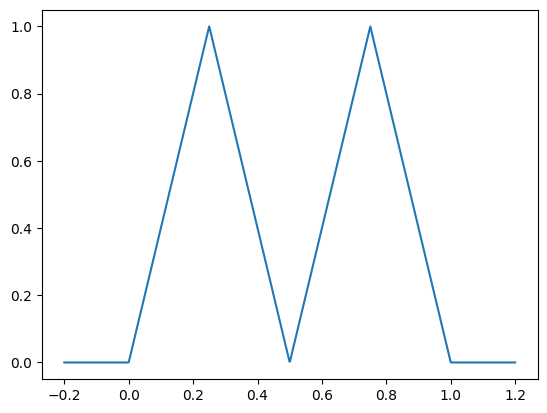

In [75]:
N=2
my_model = rectangleNN(n=3, l=1)
my_model.fc1.weight = torch.nn.Parameter(torch.tensor([[1.0],[1.0],[1.0]], dtype=torch.float32, requires_grad=True))
my_model.fc1.bias = torch.nn.Parameter(torch.tensor([0.0,-0.5,-1.0], dtype=torch.float32, requires_grad=True))

my_model.intermediate[0].weight = torch.nn.Parameter(torch.tensor([[2.0,  2.0,  2.0], 
                                                                   [-4.0, -4.0,  -4.0],
                                                                   [2.0,  2.0, 2.0]], dtype=torch.float32, requires_grad=True).T)
my_model.intermediate[0].bias = torch.nn.Parameter(torch.tensor([0.0, -0.5,  -1.0], dtype=torch.float32, requires_grad=True))

my_model.fc2.weight = torch.nn.Parameter(torch.tensor([[2.0,-4.0,2.0]], dtype=torch.float32, requires_grad=True))
my_model.fc2.bias = torch.nn.Parameter(torch.tensor([0.0], dtype=torch.float32, requires_grad=True))
x = np.linspace(-0.2, 1.2, 1000)

y = my_model.forward(torch.tensor(x, dtype=torch.float32)[:,None])

plt.figure()
plt.plot(x, y.detach().numpy())
plt.show()


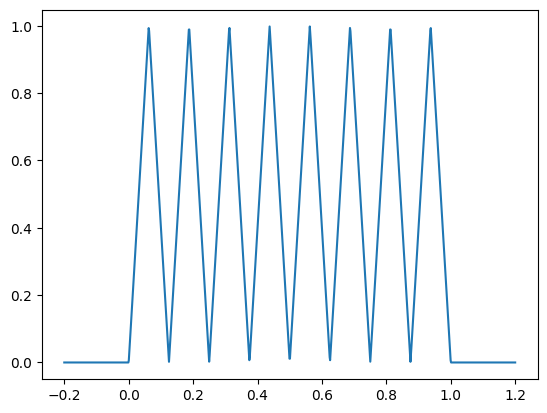

In [76]:
N=4
my_model = rectangleNN(n=3, l=N-1)
my_model.fc1.weight = torch.nn.Parameter(torch.tensor([[1.0],[1.0],[1.0]], dtype=torch.float32, requires_grad=True))
my_model.fc1.bias = torch.nn.Parameter(torch.tensor([0.0,-0.5,-1.0], dtype=torch.float32, requires_grad=True))

for i in range (N-1):

    my_model.intermediate[i].weight = torch.nn.Parameter(torch.tensor([[2.0,  2.0,  2.0], 
                                                                   [-4.0, -4.0,  -4.0],
                                                                   [2.0,  2.0, 2.0]], dtype=torch.float32, requires_grad=True).T)
    my_model.intermediate[i].bias = torch.nn.Parameter(torch.tensor([0.0, -0.5,  -1.0], dtype=torch.float32, requires_grad=True))

my_model.fc2.weight = torch.nn.Parameter(torch.tensor([[2.0,-4.0,2.0]], dtype=torch.float32, requires_grad=True))
my_model.fc2.bias = torch.nn.Parameter(torch.tensor([0.0], dtype=torch.float32, requires_grad=True))
x = np.linspace(-0.2, 1.2, 1000)

y = my_model.forward(torch.tensor(x, dtype=torch.float32)[:,None])

plt.figure()
plt.plot(x, y.detach().numpy())
plt.show()


How many neurons did you need in the hidden layer? How will that evolve when the level increase?

We need $3*{level}$ neurons, this increases linearly with `level`.

In a semilogy, plot the number of neurons used to replicate $g$ as a function of `level` (ranging from 1 to 15), by increasing the width and the depth.

In a semilogy, plot the number of parameters used to replicate $g$ as a function of `level` (ranging from 1 to 15), by increasing the width and the depth.

### Training

We will try to fit `g` with `level = 4` both with deep and wide networks; This time, by training the network, instead of manually setting the weights.

First, train a wide network, of course, it will need more neurons than the mathematically optimal solutions.
Try with 5 times more neurons than in the optimal solution, and about $15000$ epochs.

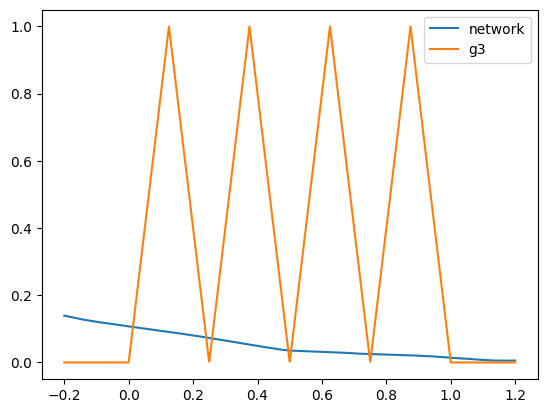

0.20747660100460052
0.0494600273668766
0.03459855914115906
0.021494561806321144
0.015489564277231693
0.011294836178421974
0.008342808112502098
0.006190698128193617
0.004615223966538906
0.0034463307820260525


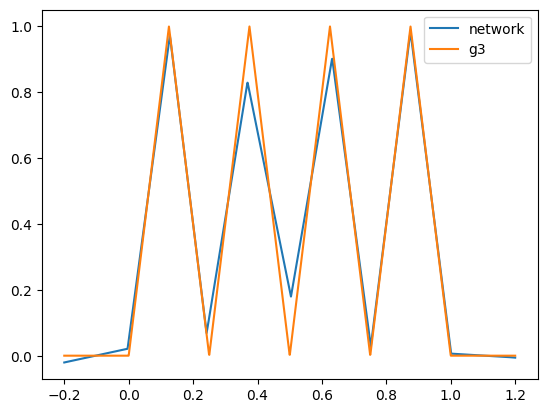

In [88]:
my_model = rectangleNN(n=150,l=0)

x = np.linspace(-0.2, 1.2, 2000)
data_train = [g(a, 3) for a in x]
x_train = torch.tensor(x, dtype=torch.float32)[:,None]
y_train = torch.tensor(data_train, dtype=torch.float32)[:,None]

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params = my_model.parameters(), lr=0.01)

n_epochs = 5000
def train():
    my_model.train()

    for epoch in range(n_epochs) :
        y = my_model.forward(x_train)
        loss = loss_fn(y, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 500 == 0:
            print(loss.item())


y = my_model.forward(x_train)

plt.figure()
plt.plot(x_train, y.detach().numpy(), label="network")
plt.plot(x_train, data_train, label="g3")
plt.legend()
plt.show()

train()

y = my_model.forward(x_train)
plt.figure()
plt.plot(x_train, y.detach().numpy(), label="network")
plt.plot(x_train, data_train, label="g3")
plt.legend()
plt.show()


*Convergence is not reached, but given a little more time, it should converge nicely towards the solution.*

Now, train a deep network, again, give a little slack on the number of neurons compared to the optimal solution.
Try with 10 times more layers than necessart, and 15 neurons per layer instead of 3, and about $5000$ epochs.

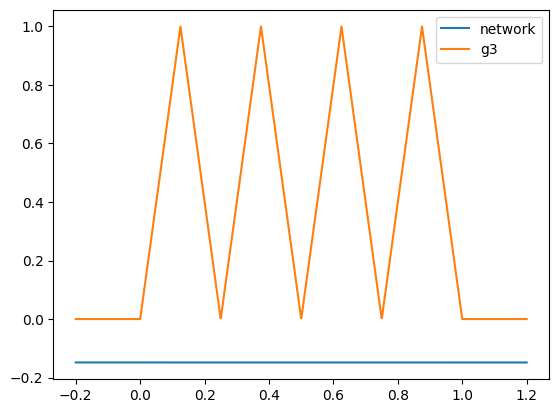

0.3659294545650482
0.08706449717283249
0.0750299021601677
0.07460256665945053
0.07460177689790726
0.07474067807197571
0.07460440695285797
0.07460716366767883
0.07464471459388733
0.0746016800403595


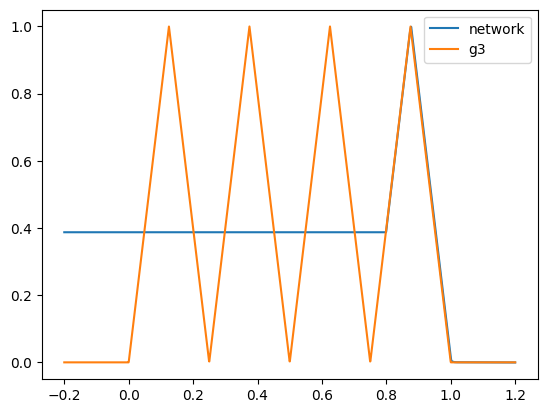

In [89]:
my_model = rectangleNN(n=10,l=8)

x = np.linspace(-0.2, 1.2, 2000)
data_train = [g(a, 3) for a in x]
x_train = torch.tensor(x, dtype=torch.float32)[:,None]
y_train = torch.tensor(data_train, dtype=torch.float32)[:,None]

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params = my_model.parameters(), lr=0.01)

n_epochs = 5000
def train():
    my_model.train()

    for epoch in range(n_epochs) :
        y = my_model.forward(x_train)
        loss = loss_fn(y, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 500 == 0:
            print(loss.item())


y = my_model.forward(x_train)

plt.figure()
plt.plot(x_train, y.detach().numpy(), label="network")
plt.plot(x_train, data_train, label="g3")
plt.legend()
plt.show()

train()

y = my_model.forward(x_train)
plt.figure()
plt.plot(x_train, y.detach().numpy(), label="network")
plt.plot(x_train, data_train, label="g3")
plt.legend()
plt.show()


- *See that the training takes much more time than with the wide network, despite the fact that we have less epochs.*
- *Observe also that there is no sign of convergence; Try to explain this.*

**Conclusion:**

The number of neurons is a good measure of the size (in terms of memory) of your network;
For the same amount of neurons, deep networks, can catch more complexity, but are harder to train.
On the contrary, wide networks catch less complexity, but are easier to train.

*Your goal as an AI engineer is to find the best architectures, so that your networks are both trainable and able to catch the complexity of the observed phenomenon.*